# University Life in Udine

Are you a student wishing to study in Udine? Here's everything you need to know.

### Some info about the notebook

In this notebook there will be content designed specifically for users, others for programmers.

This distinction is made explicit by the use of the following icons:
- User $\rightarrow$ 🧍‍♂️
- Programmer $\rightarrow$ 👨‍💻

---

## Setup

👨‍💻 We import the necessary libraries for the notebook to correctly work.

In [1]:
import geopandas as gpd
import pygeos
import pyrosm

print("> Libraries Imported")

> Libraries Imported


## Map of the City

🧍‍♂️ Below you will find a simplified map of the city with all the main locations that might interest you.

👨‍💻 The steps to build the map follow

In [7]:
# import data on Italian municipalities
italy_municipalities_path = "data/Com01012021_g/Com01012021_g_WGS84.shp"
italy_municipalities = gpd.read_file(italy_municipalities_path)

# save Udine and the municipalities in the province of Udine
udine_geodf = italy_municipalities.loc[italy_municipalities["COMUNE"] == "Udine"]
udine_mun_geodf = italy_municipalities.loc[italy_municipalities["COD_PROV"] == 30]

<AxesSubplot:>

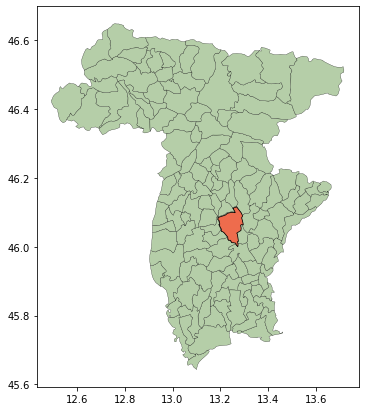

In [17]:
# Let's plot what we have

# create the base plot with the municipalities
base = udine_mun_geodf.to_crs(epsg=4326).plot(
    figsize=(10, 7),
    color="#b5cea8",
    edgecolor="k",
    linewidth = 0.25
    )

# plot hover the municipalities Udine and highlights it
udine_geodf.to_crs(epsg=4326).plot(
    facecolor='none', 
    ax=base,
    color="#EE6C4D",
    edgecolor="k",
    linewidth = 0.75
    )

In [18]:
# we now import the .pbf file of the city, obtained through Wikimedia Italy
udine_osm = pyrosm.OSM("data/udine.osm.pbf")

In [39]:
# we obtain the buildings
udine_buildings = udine_osm.get_buildings()

# and the streets
udine_streets_driving = udine_osm.get_network(network_type="driving")
udine_streets_walking = udine_osm.get_network(network_type="walking")

In [49]:
# we clip the buildings and streets obtained based on the map of Udine
udine_buildings_clipped = gpd.clip(udine_buildings, udine_geodf.to_crs(epsg=4326))
udine_streets_driving_clipped = gpd.clip(udine_streets_driving, udine_geodf.to_crs(epsg=4326))
udine_streets_walking_clipped = gpd.clip(udine_streets_walking, udine_geodf.to_crs(epsg=4326))

<AxesSubplot:>

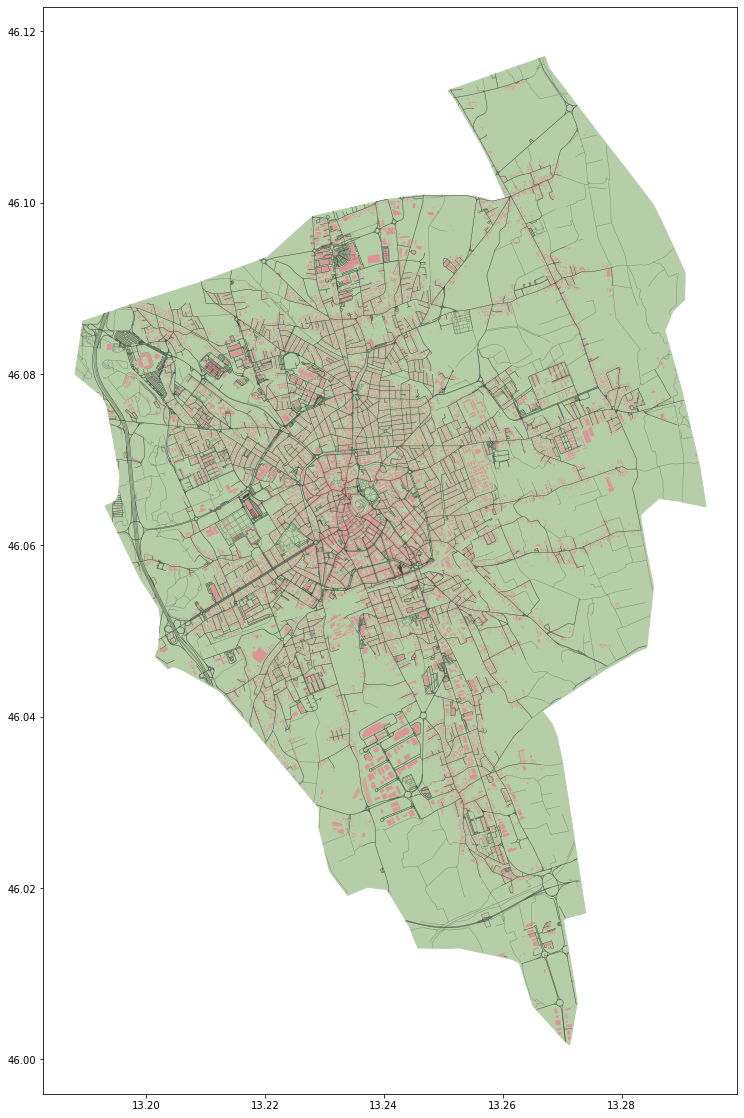

In [50]:
# create the base map of Udine
base = udine_geodf.to_crs(epsg=4326).plot(
    facecolor='none', 
    figsize=(20, 20),
    color="#b5cea8",
    edgecolor="#b5cea8"
    )

# add buildings
udine_buildings_clipped.plot(
    ax=base,
    color="#DC9596"
    )

# add streets
udine_streets_driving_clipped.plot(ax=base, color="#1F1F1F", lw=0.5, alpha=0.5)
udine_streets_walking_clipped.plot(ax=base, color="#3D3D3D", lw=0.4, alpha=0.5)

### Points of interest for university students

That we can obtain using OSM.

*Key Places*
- university
- hospital

*Transport*
- bicycle_rental
- bus_station
- bus_stop
- car_rental

*Free Time*
- arts_centre
- bar
- cafe
- cinema
- ice_cream
- library
- nightclub
- pub
- theatre

*Food*
- fast_food
- restaurant

*Money*
- atm
- bank

In [19]:
udine_osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [26]:
udine_osm.conf.tags.public_transport

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'stop_position',
 'platform',
 'public_transport',
 'station',
 'stop_area']